# Ukranian Audio Digits Recognition

## Environment Setup

In [1]:

from colabcode import ColabCode

In [2]:
%%writefile requirements.txt

torch #pytorch
torchvision
matplotlib
numpy
tqdm
pandas
opencv-python #cv2
albumentations

Writing requirements.txt


In [3]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 10.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 11.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.3/169.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.2
    Uninstalling torch-2.1.2:
      Successfully uninstalled torch-2.1.2


## Imports

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from misc.constants import CONST
from misc.setup import Initializer
import librosa
from scipy.fftpack import dct
import librosa.display

## Project misc functions

In [5]:
def count_paths(paths):
    count_woman = sum('woman' in path.lower() for path in paths)
    count_man = sum('man' in path.lower() and 'woman' not in path.lower() for path in paths)

    return count_woman, count_man

## Project Setup

In [6]:
initializer = Initializer(CONST.DATA_PATH)
initializer.initialize_project()

## Simple Data Analys

Our dataset contain recordings of digits from `0` to `1`. We implement this dataset by ourselves. In total we have 100 different men women voices with different age starting from `10` ending `60`. However the median and mode is about `20` years old. 

In [7]:
df = pd.read_csv(CONST.CSV_PATH)

print("Total amount of recordings: ", len(df))

Total amount of recordings:  879


In [8]:
df.head()

,file_path,label
0,/Users/dimaevcenko/Documents/spoken_digit_proj...,0
1,/Users/dimaevcenko/Documents/spoken_digit_proj...,5
2,/Users/dimaevcenko/Documents/spoken_digit_proj...,4
3,/Users/dimaevcenko/Documents/spoken_digit_proj...,6
4,/Users/dimaevcenko/Documents/spoken_digit_proj...,7


In [10]:
count_woman, count_man = count_paths(df['file_path'].tolist())

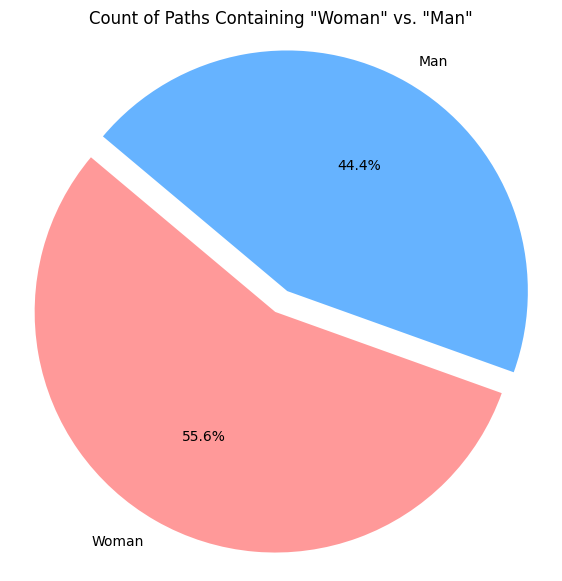

In [11]:
labels = ['Woman', 'Man']
sizes = [count_woman, count_man]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Count of Paths Containing "Woman" vs. "Man"')
plt.show()

## Data Processing

In [34]:
df_subset = df.head(15)

mfcc_features = []
for file_path in df_subset['file_path']:
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfcc_features.append(mfccs_mean)

df_subset['MFCC'] = mfcc_features

/var/folders/nw/pb0znbfj0r3288jhzshl4c8h0000gn/T/ipykernel_39471/875552146.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['MFCC'] = mfcc_features


### Visualize MFCC

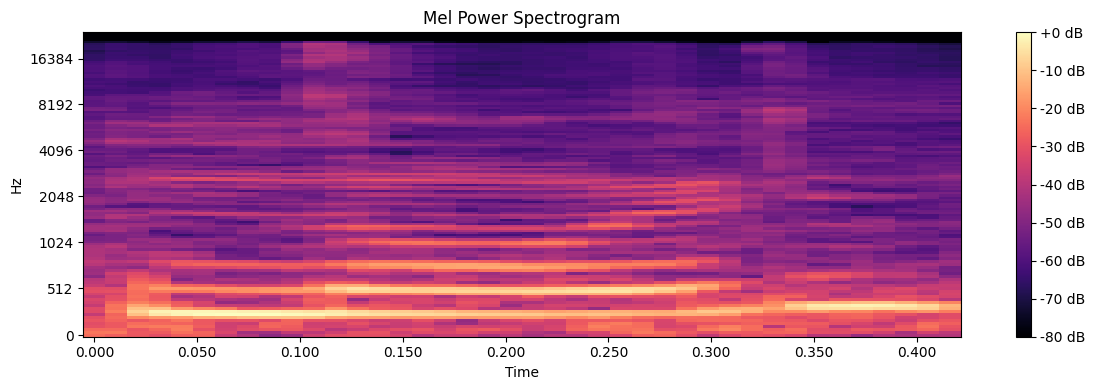

In [44]:
file_path = df_subset['file_path'].iloc[0]
audio, sample_rate = librosa.load(file_path, sr=None)

S = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=128)

log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))

librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')

plt.title('Mel Power Spectrogram')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()
plt.show()

In [33]:
from lfcc import lfcc

lfcc_features = []
for file_path in df_subset['file_path']:
    audio, sample_rate = librosa.load(file_path, sr=None)
    lfccs = lfcc(y=audio, sr=sample_rate)
    lfcc_features.append(lfccs)

df_subset['LFCC'] = lfcc_features

/var/folders/nw/pb0znbfj0r3288jhzshl4c8h0000gn/T/ipykernel_39471/413918498.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['LFCC'] = lfcc_features


## CQCC Implementation and saving according to audio file

In [36]:
def extract_CQCC(file_path):
    audio_path = file_path
    y, sr = librosa.load(audio_path)
    # Compute the Constant Q Transform
    CQT = librosa.cqt(y, sr=sr)
    # Convert to Power Spectrum
    power_CQT = np.abs(CQT)**2
    # apply log
    log_power_CQT = librosa.amplitude_to_db(power_CQT)
    cqcc = dct(log_power_CQT, type=2, axis=-1, norm='ortho')
    cqcc = cqcc[:13]
    return cqcc

cqcc_features = []
for file_path in df_subset['file_path']:
    cqcc = extract_CQCC(file_path)
    cqcc_features.append(cqcc)

df_subset['CQCC'] = cqcc_features

/Library/Python/3.9/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=256 is too large for input signal of length=146
  warnings.warn(
/Library/Python/3.9/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=256 is too large for input signal of length=136
  warnings.warn(
/Library/Python/3.9/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=256 is too large for input signal of length=174
  warnings.warn(
/Library/Python/3.9/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=256 is too large for input signal of length=144
  warnings.warn(
/Library/Python/3.9/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=256 is too large for input signal of length=152
  warnings.warn(
/Library/Python/3.9/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=256 is too large for input signal of length=210
  warnings.warn(
/Library/Python/3.9/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=256 is too large for input si

0     [[-334.72855, 13.290511, 6.063907, -0.7023545,...
1     [[-338.41577, -1.042279e-05, -5.1446073e-06, -...
2     [[-383.7826, 3.044363, -7.356224, -5.8978357, ...
3     [[-339.51288, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
4     [[-360.62537, -4.933696e-06, -4.8830852e-06, 4...
5     [[-320.67725, -3.2987323, -5.7756805, 3.452076...
6     [[-315.8883, 0.0, 0.0, -2.5169638e-06, -4.8803...
7     [[-374.52167, 4.933696e-06, 4.8830852e-06, -9....
8     [[-373.3238, 0.716537, 3.5926843, -0.5708637, ...
9     [[-377.8805, 5.396712, 4.229373, 2.6329632, 1....
10    [[-253.85167, -2.0662274, -9.093832, 0.1367141...
11    [[-353.39172, 1.042279e-05, 0.0, 0.0, 0.0, 1.1...
12    [[-322.20697, 6.3384204, 2.8975015, 0.4247501,...
13    [[-293.33942, -16.447021, -3.9799604, 3.837189...
14    [[-426.14813, -6.3712645, -2.8871741, -23.2681...
Name: CQCC, dtype: object


/var/folders/nw/pb0znbfj0r3288jhzshl4c8h0000gn/T/ipykernel_39471/3559141020.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['CQCC'] = cqcc_features


In [37]:
print(df_subset.head())

                                           file_path  label  \
0  /Users/dimaevcenko/Documents/spoken_digit_proj...      0   
1  /Users/dimaevcenko/Documents/spoken_digit_proj...      5   
2  /Users/dimaevcenko/Documents/spoken_digit_proj...      4   
3  /Users/dimaevcenko/Documents/spoken_digit_proj...      6   
4  /Users/dimaevcenko/Documents/spoken_digit_proj...      7   

                                                MFCC  \
0  [-399.16827, 119.56348, 14.460864, 45.340397, ...   
1  [-353.32925, 120.74446, 5.925511, 25.075254, 0...   
2  [-358.8274, 102.72849, 4.879433, 37.750263, -0...   
3  [-340.9078, 46.635857, -3.3306942, 66.18793, 5...   
4  [-338.93134, 49.50678, 11.878546, 62.033737, -...   

                                                CQCC  
0  [[-334.72855, 13.290511, 6.063907, -0.7023545,...  
1  [[-338.41577, -1.042279e-05, -5.1446073e-06, -...  
2  [[-383.7826, 3.044363, -7.356224, -5.8978357, ...  
3  [[-339.51288, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....  
4  [[-360